# SOM

The SOM, given an input vector $\vec{x}$ and the best matching unit index $i(\vec{x})$, the learning rule for the reference vector for unit $j$ is:
$$ \vec{w}_j \leftarrow \vec{w}_j + \eta h(j,i(\vec{x}))(\vec{x} - \vec{w}_j) $$

- The learning rate is fixed $\eta = 1$.

- Let $h(j,i(\vec{x})) = 1$, for the best matching unit $j=i(\vec{x})$, $h(j,i(\vec{x})) = \frac{2}{3}$ for its immediate neighbor ($j = i(\vec{x})\pm1$) and $h(j,i(\vec{x})) = \frac{1}{3}$ for its second-order neighbor ($j = i(\vec{x})\pm2$). For all the rest, $h(j,i(\vec{x})) =0$.



Consider a 1-D SOM with 7 units with the following weight vectors.
We plot the vectors and connect them according to the order given below ($\vec{w}_1$ connected to $\vec{w}_2$, etc.).




$$\vec{w}$$ | $$w_1$$ | $$w_2$$ |
--- | --- | --- | 
$\vec{w}_1$ | 8 | 1 |
$\vec{w}_2$ | 9 | 8 |
$\vec{w}_3$ | 0 | 4 |
$\vec{w}_4$ | 9 | 1 |
$\vec{w}_5$ | 7 | 10 |
$\vec{w}_6$ | 3 | 0 |
$\vec{w}_7$ | 8 | 5 |

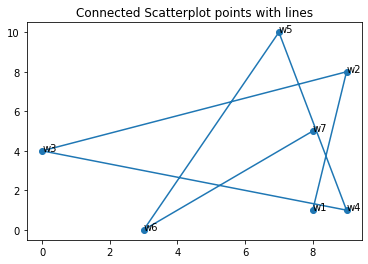

In [3]:
import numpy as np
import matplotlib.pyplot as plt
  
# initialize x and y coordinates
x = [8, 9, 0, 9, 7, 3, 8]
y = [1, 8, 4, 1, 10, 0, 5]
n = ["w1", "w2", "w3", "w4", "w5", "w6", "w7"]  

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, y)
plt.title("Connected Scatterplot points with lines")

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

Given an input vector $\vec{x} = (1,3)$, we plot how the weight vectors change after one iteration of training. Plot in the same graph as (1) above.

In the figure blue represent original configuration of weights, red represents after single iteration of the training 

[1, 1.66, 5.6899999999999995, 9, 9, 7, 8] [3, 0.67, 1.0, 8, 1, 10, 5] ['w3', 'w6', 'w1', 'w2', 'w4', 'w5', 'w7']


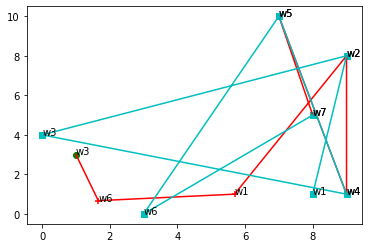

In [4]:


def eucl_dist(x,y,a,b):
  p = (x-a)**2
  q = (y-b)**2
  return np.sqrt(p+q)

#eucl_dist(x,y,a,b)

w1 = []
w2 = []
n_lbs = []
lbs = ["w1", "w2", "w3", "w4", "w5", "w6", "w7"]

def find_bmu(input,weights,lbs):
  min_dist = 10000
  for i in range(len(weights[0])):
    lb = lbs[i]
    x = input[0]
    y = input[1]
    a = weights[0][i]
    b = weights[1][i]
    euc_dist = eucl_dist(x,y,a,b)
    if euc_dist < min_dist:
      min_dist=euc_dist
      bmu_idx=np.array([a,b])
      a1 = a
      b1 = b
      lb1 = lb 
  return a1,b1,min_dist,bmu_idx,lb1    



weights = [[8, 9, 0, 9, 7, 3, 8], [1, 8, 4, 1, 10, 0, 5]]

input = [1,3]


a,b,dist, x,lb = find_bmu(input,weights,lbs)
w1x = a + 1*1*(1-a)
w1.append(w1x)
w2x = b + 1*1*(3-b)
w2.append(w2x)
weights[0].remove(x[0])
weights[1].remove(x[1])
n_lbs.append(lb)
lbs.remove(lb)
a,b,dist, x, lb = find_bmu(input,weights,lbs)
w1x = a + 1*0.67*(1-a)
w1.append(w1x)
w2x = b + 1*0.67*(1-b)
w2.append(w2x)
weights[0].remove(x[0])
weights[1].remove(x[1])
n_lbs.append(lb)
lbs.remove(lb)
a,b,dist, x,lb = find_bmu(input,weights,lbs)
w1x = a + 1*0.33*(1-a)
w1.append(w1x)
w2x = b + 1*0.33*(1-b)
w2.append(w2x)
weights[0].remove(x[0])
weights[1].remove(x[1])
n_lbs.append(lb)
lbs.remove(lb)

for i in range(4):
  w1.append(weights[0][i])
  w2.append(weights[1][i])
  n_lbs.append(lbs[i])

print(w1,w2,n_lbs)

x = [8, 9, 0, 9, 7, 3, 8]
y = [1, 8, 4, 1, 10, 0, 5]
n = ["w1", "w2", "w3", "w4", "w5", "w6", "w7"] 

fig, ax = plt.subplots()
ax.scatter(w1, w2, color='r', marker='+')
ax.plot(w1, w2, color='r')
ax.scatter(x, y, color='c', marker='s')
ax.plot(x, y, color='c')
ax.scatter(1, 3, color='g')

for i, txt in enumerate(n_lbs):
    ax.annotate(txt, (w1[i], w2[i]))
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))